# Creating Figure 4.4 for Thesis: Density plot and correlation matrices for NIPE

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')



import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

import utils.sbi_modulated_functions as sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.11.0


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

    
prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)


density_estimator = 'nsf'


In [5]:

from utils import inference

In [17]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os

file = '10000sims_17params_11_04_nsf_fake_ratio'


os.chdir('results')


posterior = torch.load('{}/posterior.pt'.format(file))



In [27]:

samples = posterior.sample((1000,))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

acceptance rate:  1.0


In [28]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [29]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.01

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-6.1178e-03,  1.2427e-02,  9.6942e-01,  7.9856e-02, -3.9008e-03,
         1.9457e+01, -1.2845e-05,  5.0582e-04,  1.3305e-02,  1.1344e-02,
        -2.2691e-02,  6.2309e+01, -2.6063e-01,  3.1207e-01, -2.6010e-03,
        -8.7128e-02,  1.1145e+02])
tensor([4.8125e-01, 1.6431e-01, 2.2958e+00, 7.8837e-01, 1.2567e-03, 2.2706e+01,
        4.4931e-05, 4.0238e-02, 3.2470e-02, 1.3414e-01, 1.1613e-01, 6.5312e+01,
        8.7867e+00, 3.9558e+00, 9.9064e-01, 1.7043e-01, 1.2366e+02])
tensor([4.8737e-03, 1.5188e-03, 1.3263e-02, 7.0852e-03, 5.1575e-05, 3.2494e-02,
        5.7776e-07, 3.9732e-04, 1.9165e-04, 1.2279e-03, 1.3882e-03, 3.0026e-02,
        9.0474e-02, 3.6437e-02, 9.9324e-03, 2.5756e-03, 1.2210e-01])


In [30]:
##better limits:
list_max2 = torch.cat((true_params[0].unsqueeze(0), torch.tensor(list_max).unsqueeze(0)), dim=0) 
list_max3 = torch.max(list_max2, 0)

list_min2 = torch.cat((true_params[0].unsqueeze(0), torch.tensor(list_min).unsqueeze(0)), dim=0) 
list_min3 = torch.min(list_min2, 0)

limits = [list(tup) for tup in zip(list_min3.values, list_max3.values)]

<Figure size 432x288 with 0 Axes>

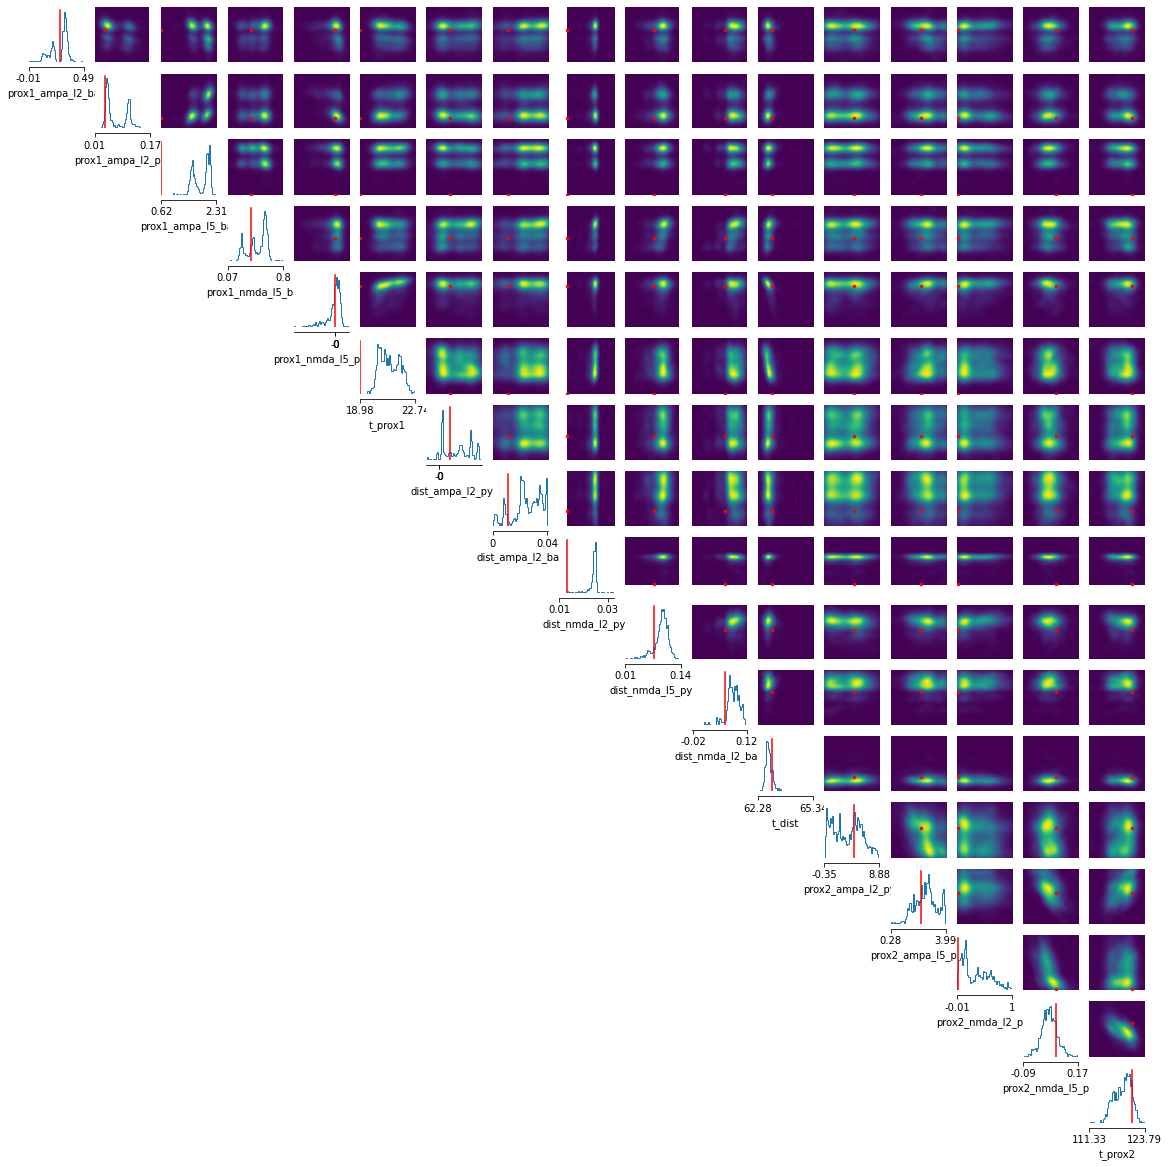

In [31]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)


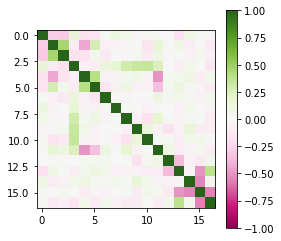

In [32]:
corr_matrix_marginal = np.corrcoef(samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

In [24]:
cond_coeff_mat_list = []

for i in range(5):
    condition = posterior.sample((1,))
    cond_coeff_mat = conditional_corrcoeff(
        density=posterior,
        condition=condition,
        limits=torch.tensor([[-2., 2.]]*17),
    )
    cond_coeff_mat_list.append(cond_coeff_mat)
    
cond_coeff_mat_tensor = torch.stack(cond_coeff_mat_list, dim=0)   

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0
acceptance rate:  1.0


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


In [25]:
cond_coeff_mat_tensor.shape

torch.Size([5, 17, 17])

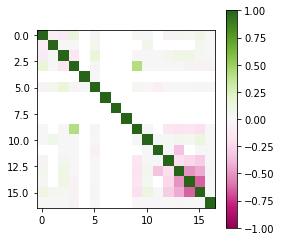

In [26]:
#take average:

cond_coeff_mat_av = torch.nanmean(cond_coeff_mat_tensor, dim = 0)

fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat_av, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)